# Libraries

In [1]:
import pySPM
print(pySPM.__version__)

0.2.21


In [148]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import os
from IPython import display
import pickle

In [3]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')

In [116]:
def get_linecut(x0,y0,x1,y1,z,xscale=1,yscale=1):
    length = int(np.hypot(x1-x0, y1-y0))
    x, y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)
    ZCOORD = z[x.astype(np.int), y.astype(np.int)]
    XCOORD = np.linspace(x0, x1,len(ZCOORD))*xscale
    YCOORD = np.linspace(y0, y1,len(ZCOORD))*yscale
    return XCOORD,YCOORD,ZCOORD

# Data

In [160]:
fname = 'crystals.001'
scan = pySPM.Bruker('Si_100nm_4days/'+fname)
scan.list_channels()

Channels
	S [Height] "Height"
	S [Phase] "Phase"
	S [AmplitudeError] "Amplitude Error"


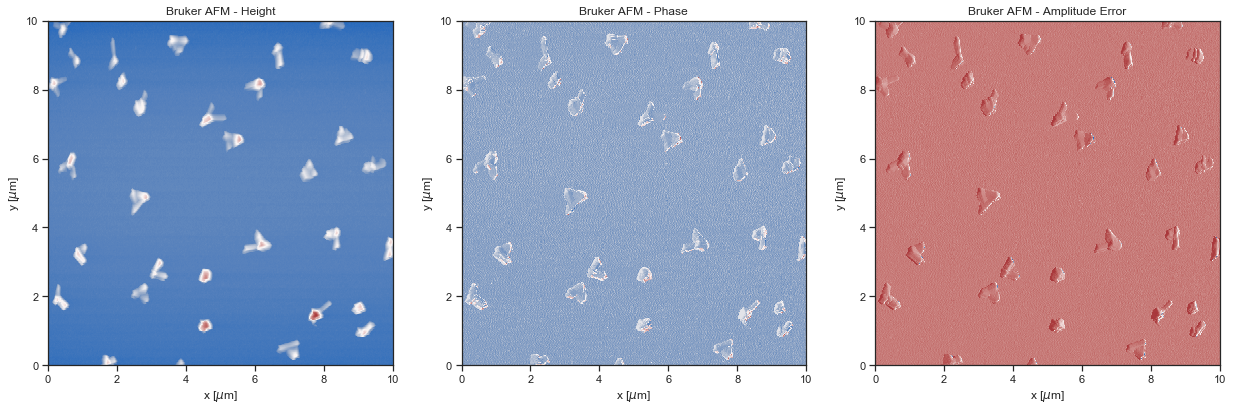

In [161]:
height = scan.get_channel("Height")
phase = scan.get_channel("Phase")
err = scan.get_channel('Amplitude Error')

fig, ax = plt.subplots(1, 3, figsize=(21, 7))
height.show(ax=ax[0],cmap='vlag')
phase.show(ax=ax[1],cmap='vlag')
err.show(ax=ax[2],cmap='vlag')

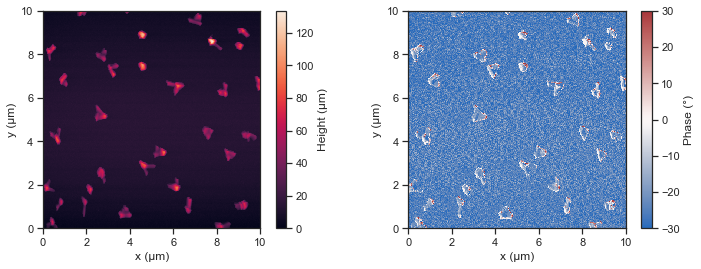

In [162]:
fig = plt.figure(figsize=(12,4))#,constrained_layout=True)
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ims = plt.imshow(height.pixels-height.pixels.min(),extent=height.get_extent())
cbar = plt.colorbar(ims)
cbar.ax.set_ylabel('Height (µm)')
ax2 = fig.add_subplot(gs[0,1])
ims2 = plt.imshow(phase.pixels,extent=phase.get_extent(),cmap='vlag',vmin=-30,vmax=30)
cbar2 = plt.colorbar(ims2)
cbar2.ax.set_ylabel('Phase (°)')

for theax in [ax1,ax2]:
    plt.sca(theax)
    plt.xlabel('x (µm)')
    plt.ylabel('y (µm)')

plt.show()
plt.close()

In [163]:
pickle.dump((height.pixels-height.pixels.min(),height.get_extent()),
           open(fname+'.pkl','wb')) 

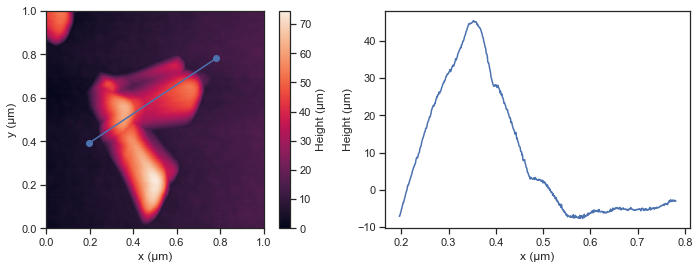

In [129]:
x0, y0 = 200, 200 # These are in _pixel_ coordinates!!
x1, y1 = 800, 400
xs = height.get_extent()[1]
ys = height.get_extent()[3]
lx,ly=height.pixels.shape

fig = plt.figure(figsize=(12,4))
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ims = plt.imshow(height.pixels-height.pixels.min(),extent=height.get_extent())
cbar = plt.colorbar(ims)
ax1.plot(np.array([x0, x1])*xs/ly, np.array([y0, y1])*ys/lx, 'o-')
cbar.ax.set_ylabel('Height (µm)')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
ax2 = fig.add_subplot(gs[0,1])
X,Y,Z = get_linecut(x0,y0,x1,y1,height.pixels.T,xscale=xs/ly)
plt.plot(X,Z)
plt.xlabel('x (µm)')
plt.ylabel('Height (µm)')

plt.show()
plt.close()

# Compile fig

In [164]:
pan1 = pickle.load(open('crystals.004.pkl','rb'))
pan2 = pickle.load(open('crystals.001.pkl','rb'))
pan3 = pickle.load(open('crystals.003.pkl','rb'))

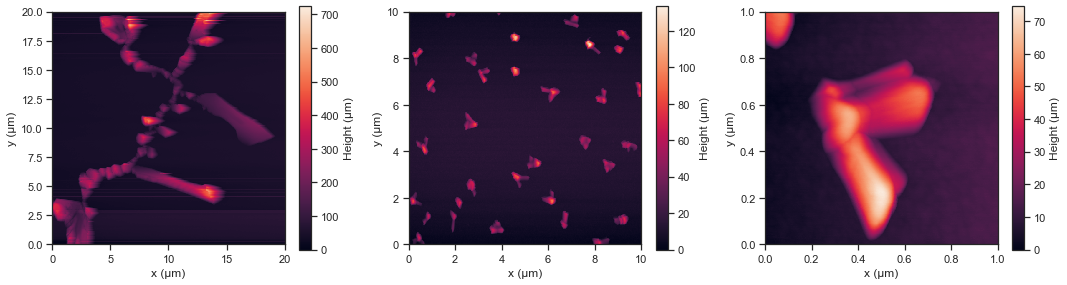

In [168]:
fig = plt.figure(figsize=(15,4))#,constrained_layout=True)
gs = fig.add_gridspec(1,3)
ax1 = fig.add_subplot(gs[0,0])
ims = plt.imshow(pan1[0],extent=pan1[1])
cbar = plt.colorbar(ims)
cbar.ax.set_ylabel('Height (µm)')
ax2 = fig.add_subplot(gs[0,1])
ims2 = plt.imshow(pan2[0],extent=pan2[1])
cbar2 = plt.colorbar(ims2)
cbar2.ax.set_ylabel('Height (µm)')
ax3 = fig.add_subplot(gs[0,2])
ims3 = plt.imshow(pan3[0],extent=pan3[1])
cbar3 = plt.colorbar(ims3)
cbar3.ax.set_ylabel('Height (µm)')

for theax in [ax1,ax2,ax3]:
    plt.sca(theax)
    plt.xlabel('x (µm)')
    plt.ylabel('y (µm)')

plt.tight_layout()
plt.savefig('crystals_height.png',bbox_to_inches='tight')
plt.show()
plt.close()